# 건강검진 데이터를 활용하여 비만 여부를 예측해 보아요!
데이터 출처: https://www.data.go.kr/data/15007122/fileData.do

## 라이브러리 불러오기

In [46]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

# 머신러닝 모델 학습 관련
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## 데이터 불러오기

In [47]:
df = pd.read_csv("./health_data.csv", encoding='cp949')
df.head()

기준년도  가입자 일련번호  시도코드  성별코드  연령대 코드(5세단위)  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
0  2019         1    11     1            13        165          65  90.0   
1  2019         2    48     2             5        155          45  64.0   
2  2019         3    41     1            13        160          70  87.0   
3  2019         4    28     1            12        170          60  85.0   
4  2019         5    41     1            10        170          70  81.2   

   시력(좌)  시력(우)  ...  감마 지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치 유무  치아마모증유무  \
0    1.5    1.2  ...    47.0   2.0   NaN          1      0.0     미시행      미시행   
1    1.2    0.5  ...    13.0   1.0   1.0          0      NaN     미시행      미시행   
2    0.9    0.8  ...    17.0   1.0   1.0          0      NaN     미시행      미시행   
3    0.4    1.2  ...    32.0   2.0   1.0          0      NaN     미시행      미시행   
4    0.7    0.7  ...    19.0   2.0   NaN          0      NaN     미시행      미시행   

   제3대구치(사랑니) 이상   치석  데이터 공개일자  
0            미시행  1.0  20191231  
1            미시행  NaN  20191231  
2            미시행  NaN  20191231  
3            미시행  NaN  20191231  
4            미시행  NaN  20191231  

[5 rows x 34 columns]

In [48]:
df.columns.values

array(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤',
       'LDL 콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT',
       '감마 지티피', '흡연상태', '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무',
       '치아마모증유무', '제3대구치(사랑니) 이상', '치석', '데이터 공개일자'], dtype=object)

In [49]:
new_cols = ["HCHK_YEAR", "IDV_ID", "SIDO", "SEX", "AGE_GROUP", "HEIGHT", "WEIGHT", "WAIST", "SIGHT_LEFT", 
            "SIGHT_RIGHT", "HEAR_LEFT", "HEAR_RIGHT", "BP_HIGH", "BP_LWST", "BLDS", "TOT_CHOLE", "TRIGLYCERIDE",
            "HDL_CHOLE", "LDL_CHOLE", "HMG", "OLIG_PROTE_CD", "CREATININE", "SGOT_AST", "SGPT_ALT", "GAMMA_GTP",
            "SMK_STAT_TYPE_CD", "DRK_YN", "HCHK_OE_INSPEC_YN", "CRS_YN", "TTH_MSS_YN", "ODT_TRB_YN", "WSDM_DIS_YN", 
            "TTR_YN", "DATA_STD__DT"]
for i in range(len(new_cols)):
    new_cols[i] = new_cols[i].lower()

## colums 이름 바꾸기

In [50]:
df.columns = new_cols
df.head()

hchk_year  idv_id  sido  sex  age_group  height  weight  waist  sight_left  \
0       2019       1    11    1         13     165      65   90.0         1.5   
1       2019       2    48    2          5     155      45   64.0         1.2   
2       2019       3    41    1         13     160      70   87.0         0.9   
3       2019       4    28    1         12     170      60   85.0         0.4   
4       2019       5    41    1         10     170      70   81.2         0.7   

   sight_right  ...  gamma_gtp  smk_stat_type_cd  drk_yn  hchk_oe_inspec_yn  \
0          1.2  ...       47.0               2.0     NaN                  1   
1          0.5  ...       13.0               1.0     1.0                  0   
2          0.8  ...       17.0               1.0     1.0                  0   
3          1.2  ...       32.0               2.0     1.0                  0   
4          0.7  ...       19.0               2.0     NaN                  0   

   crs_yn  tth_mss_yn  odt_trb_yn  wsdm_dis_yn  ttr_yn  data_std__dt  
0     0.0         미시행         미시행          미시행     1.0      20191231  
1     NaN         미시행         미시행          미시행     NaN      20191231  
2     NaN         미시행         미시행          미시행     NaN      20191231  
3     NaN         미시행         미시행          미시행     NaN      20191231  
4     NaN         미시행         미시행          미시행     NaN      20191231  

[5 rows x 34 columns]

## 일부 컬럼 제거

In [51]:
drop_cols = ['hchk_year','idv_id','sido', 'hchk_oe_inspec_yn', 'crs_yn', 'tth_mss_yn', 'odt_trb_yn',
             'wsdm_dis_yn', 'ttr_yn', 'data_std__dt', 'sight_left', 'sight_right', 'hear_left', 'hear_right']

df.drop(drop_cols, axis=1, inplace=True)
df.head()

sex  age_group  height  weight  waist  bp_high  bp_lwst   blds  tot_chole  \
0    1         13     165      65   90.0    112.0     70.0   93.0        NaN   
1    2          5     155      45   64.0    114.0     76.0   89.0        NaN   
2    1         13     160      70   87.0    109.0     73.0  100.0      232.0   
3    1         12     170      60   85.0    131.0     85.0   85.0        NaN   
4    1         10     170      70   81.2    112.0     66.0   91.0        NaN   

   triglyceride  hdl_chole  ldl_chole   hmg  olig_prote_cd  creatinine  \
0           NaN        NaN        NaN  15.5            1.0         1.0   
1           NaN        NaN        NaN  14.0            1.0         0.5   
2         114.0       57.0      152.0  15.6            1.0         1.0   
3           NaN        NaN        NaN  14.5            1.0         0.7   
4           NaN        NaN        NaN  14.9            1.0         0.9   

   sgot_ast  sgpt_alt  gamma_gtp  smk_stat_type_cd  drk_yn  
0      18.0      32.0       47.0               2.0     NaN  
1      15.0       8.0       13.0               1.0     1.0  
2      30.0      21.0       17.0               1.0     1.0  
3      17.0      19.0       32.0               2.0     1.0  
4      19.0      24.0       19.0               2.0     NaN

## null 값 채우기

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   sex               1000000 non-null  int64  
 1   age_group         1000000 non-null  int64  
 2   height            1000000 non-null  int64  
 3   weight            1000000 non-null  int64  
 4   waist             999597 non-null   float64
 5   bp_high           994576 non-null   float64
 6   bp_lwst           994575 non-null   float64
 7   blds              994477 non-null   float64
 8   tot_chole         333549 non-null   float64
 9   triglyceride      333544 non-null   float64
 10  hdl_chole         333541 non-null   float64
 11  ldl_chole         327148 non-null   float64
 12  hmg               994468 non-null   float64
 13  olig_prote_cd     989694 non-null   float64
 14  creatinine        994474 non-null   float64
 15  sgot_ast          994478 non-null   float64
 16  s

In [53]:
# null 값 데이터 개수가 500,000 개 이상이면 dropna, 500,000 미만이면 median 값 대체
drop_cols = []
for column in df.columns:
    if sum(df.loc[:, column].isnull()) <500000:
        df.loc[:, column].fillna(df.loc[:, column].median(), inplace=True)
    else:
        drop_cols.append(column)
df.dropna(subset=drop_cols, inplace=True)
df.shape

(327143, 20)

In [54]:
df.head(10)

sex  age_group  height  weight  waist  bp_high  bp_lwst   blds  tot_chole  \
2     1         13     160      70   87.0    109.0     73.0  100.0      232.0   
5     1          8     170     110  107.8    139.0     87.0  108.0      215.0   
6     1          6     175      70   81.3    120.0     72.0   90.0      148.0   
10    1         11     170      75   86.5    140.0     80.0   87.0      193.0   
12    2         11     150      65   94.0    123.0     69.0   82.0      252.0   
19    2          9     150      45   66.8     98.0     70.0   97.0      203.0   
22    2         13     150      60   71.0    157.0     98.0   96.0      155.0   
24    1          9     170      70   89.0    120.0     80.0  104.0      198.0   
25    1         13     165      65   82.0    180.0    120.0  126.0      216.0   
26    1         10     170      75   83.0    124.0     82.0  114.0      194.0   

    triglyceride  hdl_chole  ldl_chole   hmg  olig_prote_cd  creatinine  \
2          114.0       57.0      152.0  15.6            1.0         1.0   
5          142.0       37.0      150.0  14.8            1.0         0.9   
6           51.0       45.0       93.0  13.1            1.0         0.9   
10         144.0       42.0      122.0  13.9            1.0         1.1   
12         163.0       43.0      176.0  13.9            1.0         0.8   
19         161.0       53.0      118.0  14.1            1.0         0.8   
22          68.0       57.0       84.0  12.9            1.0         0.6   
24         176.0       48.0      114.0  15.9            1.0         0.9   
25          92.0       52.0      145.0  16.0            1.0         1.0   
26         132.0       45.0      123.0  14.4            1.0         0.8   

    sgot_ast  sgpt_alt  gamma_gtp  smk_stat_type_cd  drk_yn  
2       30.0      21.0       17.0               1.0     1.0  
5       42.0      44.0      129.0               1.0     1.0  
6       14.0      11.0       30.0               2.0     1.0  
10      21.0      22.0       37.0               2.0     1.0  
12      22.0      13.0       39.0               1.0     1.0  
19      16.0      16.0        8.0               2.0     1.0  
22      15.0      16.0       25.0               1.0     1.0  
24      19.0      22.0       26.0               1.0     1.0  
25      30.0      26.0       56.0               2.0     1.0  
26      26.0      41.0       32.0               2.0     1.0

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327143 entries, 2 to 999996
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               327143 non-null  int64  
 1   age_group         327143 non-null  int64  
 2   height            327143 non-null  int64  
 3   weight            327143 non-null  int64  
 4   waist             327143 non-null  float64
 5   bp_high           327143 non-null  float64
 6   bp_lwst           327143 non-null  float64
 7   blds              327143 non-null  float64
 8   tot_chole         327143 non-null  float64
 9   triglyceride      327143 non-null  float64
 10  hdl_chole         327143 non-null  float64
 11  ldl_chole         327143 non-null  float64
 12  hmg               327143 non-null  float64
 13  olig_prote_cd     327143 non-null  float64
 14  creatinine        327143 non-null  float64
 15  sgot_ast          327143 non-null  float64
 16  sgpt_alt          32

## bmi 컬럼 추가
BMI = 체중(kg) / (키(m) * 키(m)) 

In [56]:
df["bmi"] = (df["weight"] / ((df["height"]*1e-2)**2)).round(0).astype(int)
df.drop(["height", "weight"], axis=1, inplace=True)
df.head()

sex  age_group  waist  bp_high  bp_lwst   blds  tot_chole  triglyceride  \
2     1         13   87.0    109.0     73.0  100.0      232.0         114.0   
5     1          8  107.8    139.0     87.0  108.0      215.0         142.0   
6     1          6   81.3    120.0     72.0   90.0      148.0          51.0   
10    1         11   86.5    140.0     80.0   87.0      193.0         144.0   
12    2         11   94.0    123.0     69.0   82.0      252.0         163.0   

    hdl_chole  ldl_chole   hmg  olig_prote_cd  creatinine  sgot_ast  sgpt_alt  \
2        57.0      152.0  15.6            1.0         1.0      30.0      21.0   
5        37.0      150.0  14.8            1.0         0.9      42.0      44.0   
6        45.0       93.0  13.1            1.0         0.9      14.0      11.0   
10       42.0      122.0  13.9            1.0         1.1      21.0      22.0   
12       43.0      176.0  13.9            1.0         0.8      22.0      13.0   

    gamma_gtp  smk_stat_type_cd  drk_yn  bmi  
2        17.0               1.0     1.0   27  
5       129.0               1.0     1.0   38  
6        30.0               2.0     1.0   23  
10       37.0               2.0     1.0   26  
12       39.0               1.0     1.0   29

## 비만 여부 컬럼 추가하기

In [77]:
df["is_obesity"] = 0
df.loc[df["bmi"] >= 30, "is_obesity"] = 1
df.drop("bmi", axis=1, inplace=True)
df.head(10)

sex  age_group  waist  bp_high  bp_lwst   blds  tot_chole  triglyceride  \
2     1         13   87.0    109.0     73.0  100.0      232.0         114.0   
5     1          8  107.8    139.0     87.0  108.0      215.0         142.0   
6     1          6   81.3    120.0     72.0   90.0      148.0          51.0   
10    1         11   86.5    140.0     80.0   87.0      193.0         144.0   
12    2         11   94.0    123.0     69.0   82.0      252.0         163.0   
19    2          9   66.8     98.0     70.0   97.0      203.0         161.0   
22    2         13   71.0    157.0     98.0   96.0      155.0          68.0   
24    1          9   89.0    120.0     80.0  104.0      198.0         176.0   
25    1         13   82.0    180.0    120.0  126.0      216.0          92.0   
26    1         10   83.0    124.0     82.0  114.0      194.0         132.0   

    hdl_chole  ldl_chole   hmg  olig_prote_cd  creatinine  sgot_ast  sgpt_alt  \
2        57.0      152.0  15.6            1.0         1.0      30.0      21.0   
5        37.0      150.0  14.8            1.0         0.9      42.0      44.0   
6        45.0       93.0  13.1            1.0         0.9      14.0      11.0   
10       42.0      122.0  13.9            1.0         1.1      21.0      22.0   
12       43.0      176.0  13.9            1.0         0.8      22.0      13.0   
19       53.0      118.0  14.1            1.0         0.8      16.0      16.0   
22       57.0       84.0  12.9            1.0         0.6      15.0      16.0   
24       48.0      114.0  15.9            1.0         0.9      19.0      22.0   
25       52.0      145.0  16.0            1.0         1.0      30.0      26.0   
26       45.0      123.0  14.4            1.0         0.8      26.0      41.0   

    gamma_gtp  smk_stat_type_cd  drk_yn  is_obesity  
2        17.0               1.0     1.0           0  
5       129.0               1.0     1.0           1  
6        30.0               2.0     1.0           0  
10       37.0               2.0     1.0           0  
12       39.0               1.0     1.0           0  
19        8.0               2.0     1.0           0  
22       25.0               1.0     1.0           0  
24       26.0               1.0     1.0           0  
25       56.0               2.0     1.0           0  
26       32.0               2.0     1.0           0

## 데이터 분할

In [78]:
x = df.drop("is_obesity", axis=1)
y = df["is_obesity"]

x.shape, y.shape

((327143, 18), (327143,))

## 학습, 검증 데이터 분리

In [79]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=42)

print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

(229000, 18) (98143, 18) (229000,) (98143,)


## 모델 학습

In [80]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [81]:
y_val_pred = lr.predict(x_valid)
accuracy_score(y_valid, y_val_pred)

0.9529258327134895

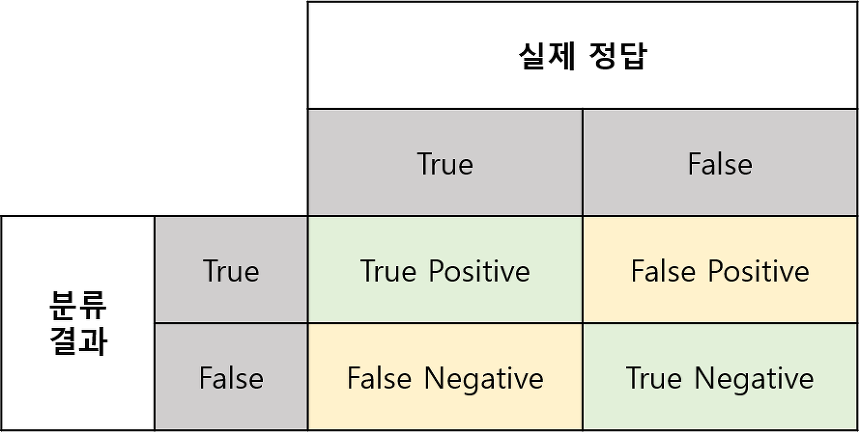
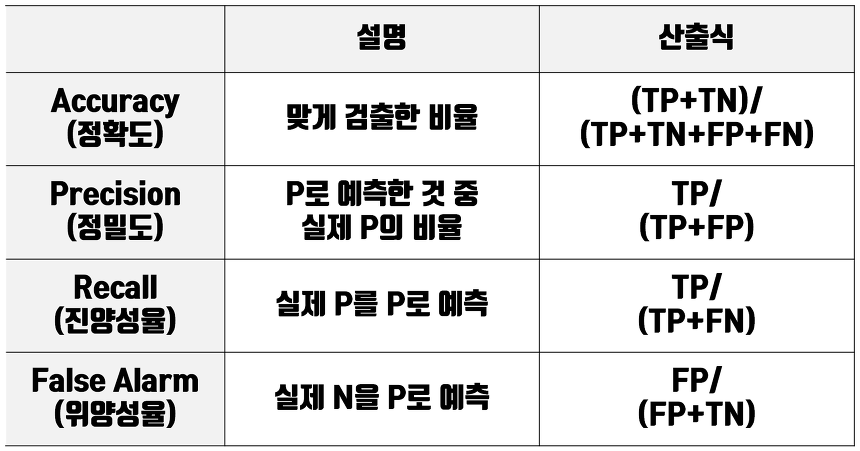

In [82]:
print(classification_report(y_valid, y_val_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     93067
           1       0.61      0.25      0.35      5076

    accuracy                           0.95     98143
   macro avg       0.79      0.62      0.66     98143
weighted avg       0.94      0.95      0.94     98143



## 데이터 분포 확인

In [83]:
df["is_obesity"].value_counts()

0    310293
1     16850
Name: is_obesity, dtype: int64

## 데이터 resampling

In [84]:
!pip install imbalanced_learn

In [85]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

## Undersampling

In [86]:
undersample = RandomUnderSampler(sampling_strategy='majority')

In [87]:
print(Counter(y))
x_under, y_under = undersample.fit_resample(x, y)
print(Counter(y_under))

Counter({0: 310293, 1: 16850})
Counter({0: 16850, 1: 16850})


## 데이터 분할 및 학습

In [88]:
x_train, x_valid, y_train, y_valid = train_test_split(x_under, y_under, test_size=0.3, random_state=42)

print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

(23590, 18) (10110, 18) (23590,) (10110,)


In [89]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_val_pred = lr.predict(x_valid)
accuracy_score(y_valid, y_val_pred)

0.8433234421364986

In [90]:
print(classification_report(y_valid, y_val_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      5103
           1       0.83      0.86      0.85      5007

    accuracy                           0.84     10110
   macro avg       0.84      0.84      0.84     10110
weighted avg       0.84      0.84      0.84     10110



## Oversampling

In [91]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

In [92]:
print(Counter(y))
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

Counter({0: 310293, 1: 16850})
Counter({0: 310293, 1: 310293})


## 데이터 분할 및 학습

In [93]:
x_train, x_valid, y_train, y_valid = train_test_split(x_over, y_over, test_size=0.3, random_state=42)

print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

(434410, 18) (186176, 18) (434410,) (186176,)


In [94]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_val_pred = lr.predict(x_valid)
accuracy_score(y_valid, y_val_pred)

0.8420634238569955

In [95]:
print(classification_report(y_valid, y_val_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     92905
           1       0.84      0.85      0.84     93271

    accuracy                           0.84    186176
   macro avg       0.84      0.84      0.84    186176
weighted avg       0.84      0.84      0.84    186176



In [112]:
over_df = x_over.join(y_over)
print(over_df.shape)
over_df.head()

(620586, 19)


sex  age_group  waist  bp_high  bp_lwst   blds  tot_chole  triglyceride  \
0    1         13   87.0    109.0     73.0  100.0      232.0         114.0   
1    1          8  107.8    139.0     87.0  108.0      215.0         142.0   
2    1          6   81.3    120.0     72.0   90.0      148.0          51.0   
3    1         11   86.5    140.0     80.0   87.0      193.0         144.0   
4    2         11   94.0    123.0     69.0   82.0      252.0         163.0   

   hdl_chole  ldl_chole   hmg  olig_prote_cd  creatinine  sgot_ast  sgpt_alt  \
0       57.0      152.0  15.6            1.0         1.0      30.0      21.0   
1       37.0      150.0  14.8            1.0         0.9      42.0      44.0   
2       45.0       93.0  13.1            1.0         0.9      14.0      11.0   
3       42.0      122.0  13.9            1.0         1.1      21.0      22.0   
4       43.0      176.0  13.9            1.0         0.8      22.0      13.0   

   gamma_gtp  smk_stat_type_cd  drk_yn  is_obesity  
0       17.0               1.0     1.0           0  
1      129.0               1.0     1.0           1  
2       30.0               2.0     1.0           0  
3       37.0               2.0     1.0           0  
4       39.0               1.0     1.0           0